# 1.	Business Problem

In [9]:
# Import required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [10]:
# Load dataset
df = pd.read_csv('Disaster_tweets_NB.csv')

In [11]:
# Preview sample rows
df.sample(3)

,id,keyword,location,text,target
5790,8261,rioting,A little house in the outback.,`bbcnews The Ass. of British Insurers says rio...,1
2005,2881,damage,??? ?? ???????,If Trillion crosses the line a 3rd time he doe...,1
1654,2389,collapsed,instagram- Chloe_Bellx,Still mortified that when I went to rose's I c...,0


In [12]:
# Basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [17]:
# Checking missing values
df.isnull().sum()  # Could use SimpleImputer if needed

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [19]:
# Shape of dataset (rows, columns)
df.shape

(7613, 5)

In [21]:
# Descriptive statistics
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


#EDA

In [24]:
# Count duplicated rows
df.duplicated().sum()

0

In [26]:
# Info again (to ensure after any changes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [28]:
# Preview a few more samples
df.sample(3)

,id,keyword,location,text,target
4894,6967,massacre,Own planet!!,I see a massacre!!,1
3469,4962,explosion,"London, UK",EE recalls Power Bar phone chargers after expl...,1
390,564,arson,Zero Branco,Wait What??? http://t.co/uAVFRtlfs4 http://t.c...,0


In [30]:
# Count of disaster (1) vs non-disaster (0)
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [32]:
# View a few example disaster tweets
df['text'][df['target'] == 1][0]
df['text'][df['target'] == 1][1]
df['text'][df['target'] == 1][3]
df['text'][df['target'] == 1][5]

'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [34]:
# Shape of disaster tweets
df['text'][df['target'] == 1].shape
df['text'][df['target'] == 1]
df[df['target'] == 1].shape

(3271, 5)

In [36]:
# Check a specific disaster tweet
df['text'][df['target'] == 1][7608]

'Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5'

In [43]:
# Again checking info and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [47]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [49]:
df.shape

(7613, 5)

In [51]:
df.sample(4)

,id,keyword,location,text,target
803,1166,blight,London,@WillHillBet what is double result live on the...,0
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0
3473,4968,explosion,"London, United Kingdom",Around 10 injured in explosion in chemical par...,1
5993,8558,screams,Freddy Fazbears pizzeria,@drag0nking0201 *Screams*don't scare me and it...,0


# Data Cleaning (Trimming)

In [56]:
df = df.dropna()

In [58]:
df.shape

(5080, 5)

In [60]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [62]:
df.sample(4)

,id,keyword,location,text,target
7471,10688,wreck,1/10 Taron squad,Season 3 of New Girl was such a emotional trai...,0
1745,2512,collision,"Ontario, Canada",COLLISION: #Hwy401 EB just east of Hwy 8 #Camb...,1
1902,2733,crushed,Sunny South florida,WRAPUP 2-U.S. cable TV companies' shares crush...,0
5287,7554,outbreak,LAGOS,Families to sue over Legionnaires: More than 4...,1


# Data Visualization 

C:\Users\Hp\AppData\Local\Temp\ipykernel_14884\3389398225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


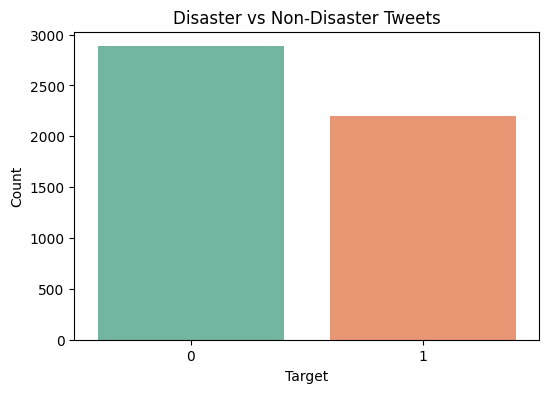

In [64]:
# 1. Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Disaster vs Non-Disaster Tweets")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

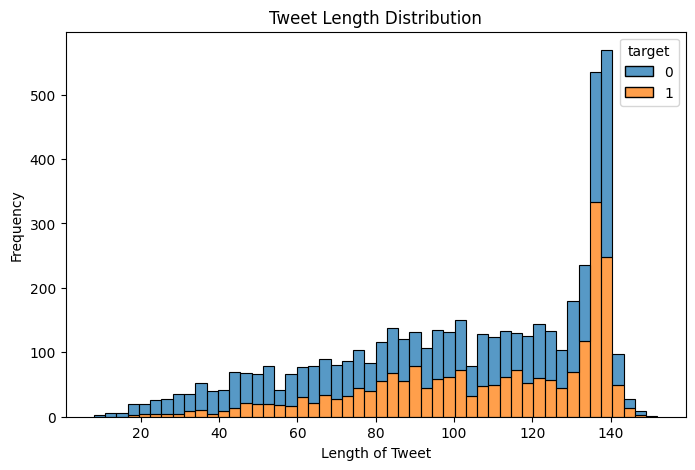

In [66]:
# 2. Tweet Length Distribution
df['text_len'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='text_len', hue='target', multiple='stack', bins=50)
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.show()

# Feature and Target Split

In [68]:
X = df.iloc[:, :-1]
y = df['target']

In [70]:
# Train-test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization

In [75]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
vector = CountVectorizer()

In [77]:
# Transforming text from train and test sets
x_train_cv = vector.fit_transform(X_train['text'])
x_test_cv = vector.transform(X_test['text'])

In [79]:
# Just checking shapes
x_train_cv.shape
X_train.shape

(4064, 5)

# Keyword Vectorization



In [82]:
X = X.iloc[:, 1:]  # Removing ID column

In [84]:
# Convert keyword to numeric
k = vector.fit_transform(X['keyword'])
numerical_df = pd.DataFrame(k.toarray(), columns=vector.get_feature_names_out())
numerical_df.shape

(5080, 239)

In [86]:
# Convert text to numeric
k = vector.fit_transform(X['text'])
numerical_df1 = pd.DataFrame(k.toarray(), columns=vector.get_feature_names_out())
numerical_df1.shape

(5080, 16420)

In [87]:
# Convert location to numeric
k = vector.fit_transform(X['location'])
numerical_df2 = pd.DataFrame(k.toarray(), columns=vector.get_feature_names_out())
numerical_df2.shape

(5080, 3261)

In [90]:
# Combine all encoded features
combined_columns = pd.concat([numerical_df, numerical_df1, numerical_df2], axis=1)
combined_columns.shape


(5080, 19920)

In [91]:
# Final Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(combined_columns, y, test_size=0.2, random_state=42)

# Model Training


In [93]:
from sklearn.naive_bayes import MultinomialNB 
clf1 = MultinomialNB()
clf1.fit(X_train, y_train)

MultinomialNB()

# Prediction and Evaluation

In [95]:
y_pre = clf1.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pre))

Accuracy: 0.8031496062992126


# Precision, Recall, F1

In [99]:
print("Precision:", precision_score(y_test, y_pre))
print("Recall:", recall_score(y_test, y_pre))
print("F1 Score:", f1_score(y_test, y_pre))

Precision: 0.7769953051643192
Recall: 0.7591743119266054
F1 Score: 0.7679814385150812


# Confusion Matrix

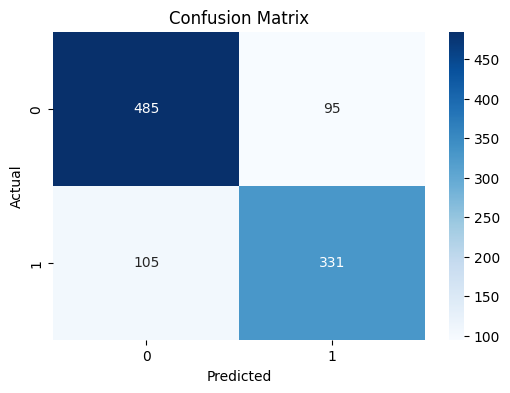

In [102]:
cm = confusion_matrix(y_test, y_pre)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()